In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_csv('experience_salary_dataset.csv')

In [33]:
df.head()

,Experience_Years,Salary
0,7,22954
1,4,8083
2,13,55868
3,11,41309
4,8,25266


In [34]:
df.corr()

,Experience_Years,Salary
Experience_Years,1.000000,0.960262
Salary,0.960262,1.000000


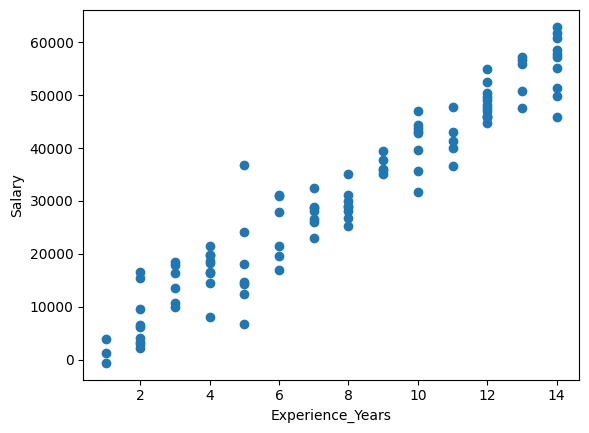

In [35]:
plt.scatter(df['Experience_Years'] , df['Salary'])
plt.xlabel('Experience_Years')
plt.ylabel('Salary')
plt.show()

In [36]:
X = df[['Experience_Years']]
y = df['Salary']

In [37]:
#train test split

from sklearn.model_selection import train_test_split

In [38]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

In [39]:
X_train.shape , X_test.shape , y_train.shape , y_tset.shape

((70, 1), (30, 1), (70,), (30,))

In [40]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

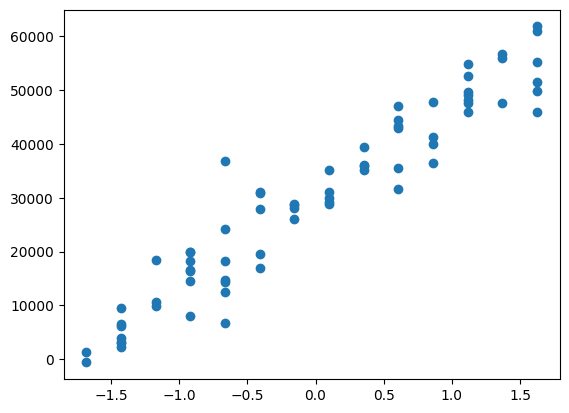

In [42]:
plt.scatter(X_train , y_train)

In [43]:
#Apply
from sklearn.linear_model import LinearRegression

In [44]:
regression = LinearRegression()

In [45]:
regression.fit(X_train , y_train)

LinearRegression()

In [46]:
print('The coeff or slope is: ', regression.coef_)
print('The intercept is: ', regression.intercept_)

The coeff or slope is:  [16269.98665678]
The intercept is:  29958.985714285714


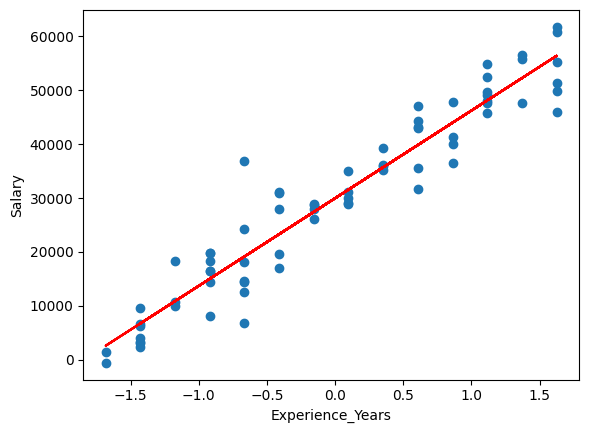

In [47]:
plt.scatter(X_train , y_train)
plt.plot(X_train , regression.predict(X_train) , color = 'red')
plt.xlabel('Experience_Years')
plt.ylabel('Salary')
plt.show()

In [48]:
y_pred = regression.predict(X_test)

In [50]:
y_pred , y_test

(array([56402.31231739, 27415.22051533, 48120.28608823, 10851.16805701,
        56402.31231739, 39838.25985907, 31556.23362991, 31556.23362991,
        27415.22051533, 27415.22051533, 10851.16805701, 48120.28608823,
        52261.29920281, 52261.29920281,  6710.15494243, 31556.23362991,
        56402.31231739,  2569.14182784, 43979.27297365, 39838.25985907,
        35697.24674449, 23274.20740075,  6710.15494243, 56402.31231739,
        48120.28608823, 14992.18117159, 48120.28608823, 14992.18117159,
        10851.16805701, 48120.28608823]),
 83    62920
 53    26540
 70    44704
 45    13572
 44    57285
 39    43718
 22    26810
 80    28123
 10    32471
 0     22954
 18    17898
 30    46006
 73    50704
 33    57212
 90    16533
 4     25266
 76    57699
 77     3963
 12    42964
 31    39695
 55    37727
 88    21532
 26    15477
 42    58507
 69    45836
 15    21498
 40    46939
 96    18681
 9     16438
 72    50388
 Name: Salary, dtype: int64)

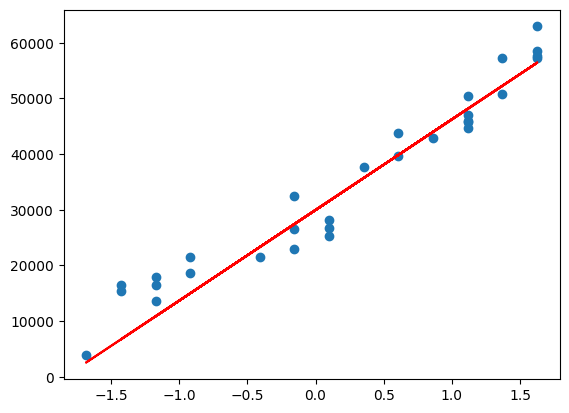

In [52]:
plt.scatter(X_test , y_test)
plt.plot(X_test , regression.predict(X_test) , color = 'red')

In [53]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
mse = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

18902220.75534658
3592.6148601067316
4347.668427484619


In [54]:
score = r2_score(y_test , y_pred)
print(score)

0.9273807977527985


In [55]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9247872548153984

In [56]:
# new datapoint

scaled_experience = scaler.transform([[10]])
scaled_experience

array([[0.6072085]])

In [57]:
print('The Salar predicted for a 10 yrs of experience is: ' , regression.predict(scaled_experience))

The Salar predicted for a 10 yrs of experience is:  [39838.25985907]


In [58]:
#Assumptions

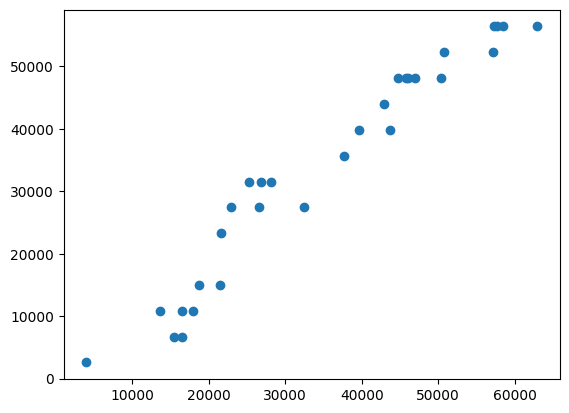

In [59]:
plt.scatter(y_test , y_pred)

In [61]:
residulas = y_test - y_pred
residulas

,Salary
83,6517.687683
53,-875.220515
70,-3416.286088
45,2720.831943
44,882.687683
39,3879.740141
22,-4746.233630
80,-3433.233630
10,5055.779485
0,-4461.220515


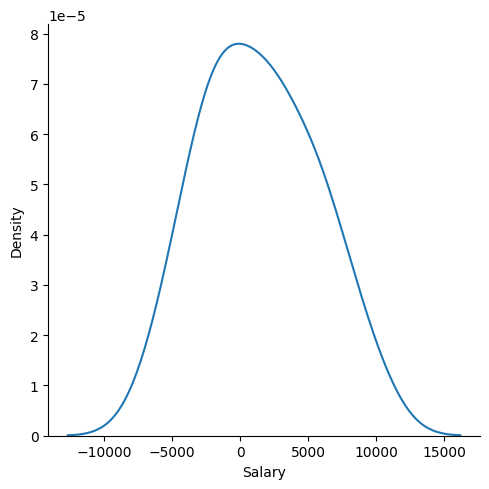

In [62]:
sns.displot(residulas , kind = 'kde')

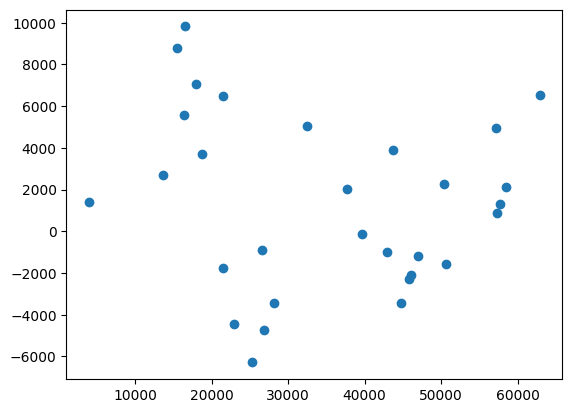

In [63]:
#scatter plot wrt to the residuals and y_test

plt.scatter(y_test , residulas)